# Analyse GANN training

## Init

Load libraries

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#sessionInfo()
#reticulate::py_install(packages = 'umap-learn')

Set paths

In [3]:
paths.train_nonorm_path <- "../data/tpm_combined_wheader.csv"
paths.test_nonorm_path <- "../data/tpm_combined_test_wheader.csv"
paths.gen_1_path <- "../data/results/gen_prof_6500.csv"

## Load and visualise

Load unnormalised training data

In [4]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,X1772072276_E05,X914mat_H11,X1772071068_B07,GHA501A161,X1772072285_A02,X1772067078_D01,X1772071037_A07,P1.4.C12,X915mat_A11,X1772067095_E06,⋯,X1772067090_F12,X1772071032_B07,X915mat_F2,P1.5.D10,X819b_A11,X1772071034_E01,X1772067095_C06,AG2pos_70,P1.3.H10,X1772067056_F11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,2.185867,0.000000,6.244983,0.000000,0.000000,0.000000,5.312883,0.000000,0,⋯,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,4.8968410,0.000000,0.000000
Cd47,0.000000,2.201634,2.211667,9.395482,3.794915,0.000000,2.703221,4.848498,3.033863,0,⋯,0.000000,0.000000,0.5058909,5.773733,3.657640,3.906619,3.543340,5.7978315,3.742006,0.000000
Elmo2,0.000000,6.457463,0.000000,1.563180,0.000000,0.000000,0.000000,4.789208,0.000000,0,⋯,0.000000,0.000000,5.3136087,5.969703,5.882399,0.000000,0.000000,0.0000000,4.473787,0.000000
Crip2,5.603894,5.970854,0.000000,0.000000,5.656519,6.397983,7.220371,4.238787,8.365010,0,⋯,7.001264,6.507275,6.4974527,2.140779,8.622308,6.761019,6.112525,5.6597434,5.048759,6.928016
Pprc1,0.000000,6.683135,0.000000,1.976308,0.000000,0.000000,0.000000,5.522935,4.855990,0,⋯,0.000000,0.000000,4.6229304,4.878235,5.195348,0.000000,0.000000,0.0000000,4.032101,0.000000
Ccdc174,5.192658,2.035624,0.000000,2.441693,0.000000,0.000000,3.153980,2.963474,0.000000,0,⋯,0.000000,0.000000,1.2326608,3.927896,5.461070,0.000000,0.000000,0.3565304,1.432959,0.000000


Load unnormalised test data

In [5]:
test_nonorm_raw <- read.table(file=paths.test_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(test_nonorm_raw)

,X1772067078_F01,X1772072256_A04,X915mat_D7,X1772071061_C06,X1772067071_E12,X1772072275_C04,X1772071025_G10,GHA501A99,P1.4.B4,X1772071026_A07,⋯,GHA501A70,P2.1.E11,P1.6.G9,X1772071066_C01,X1772067071_C11,P1.4.D3,X1772067085_C01,X1772067084_E05,X1772067086_A07,X1772071066_E04
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,4.3412742,3.184861,0.000000,0.000000,0,3.921598,0.000000,0.000000,⋯,1.7801001,2.733354,0.000000,0,0.000000,5.057450,0.000000,0.00000,0.000000,0
Cd47,0.000000,4.431887,0.0000000,1.863625,3.542647,0.000000,0,8.581246,5.945093,3.837048,⋯,9.2950091,6.300673,4.323370,0,0.000000,5.549361,3.452111,0.00000,2.307694,0
Elmo2,0.000000,0.000000,0.9259994,0.000000,0.000000,0.000000,0,6.343773,0.000000,3.481645,⋯,0.5416181,5.930737,5.809157,0,3.165435,4.999549,1.537250,0.00000,0.000000,0
Crip2,5.867711,4.772839,7.9027972,6.168253,0.000000,5.438343,0,0.000000,9.175450,6.687053,⋯,0.0000000,3.646163,4.496335,0,6.339514,3.097611,6.441090,6.66738,6.842295,0
Pprc1,0.000000,0.000000,2.6735564,0.000000,0.000000,0.000000,0,2.725903,0.000000,0.000000,⋯,0.2765536,3.224966,4.494416,0,0.000000,3.739848,0.000000,0.00000,0.000000,0
Ccdc174,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0,1.939234,0.000000,4.325534,⋯,5.3613503,3.181103,1.594549,0,0.000000,3.925999,0.000000,0.00000,0.000000,0


Load gen prof-1

In [6]:
genprof_1_raw <- read.table(file=paths.gen_1_path, sep=",", row.names = 1, header=TRUE)
head(genprof_1_raw)

,gencell_ep6500_0,gencell_ep6500_1,gencell_ep6500_2,gencell_ep6500_3,gencell_ep6500_4,gencell_ep6500_5,gencell_ep6500_6,gencell_ep6500_7,gencell_ep6500_8,gencell_ep6500_9,⋯,gencell_ep6500_490,gencell_ep6500_491,gencell_ep6500_492,gencell_ep6500_493,gencell_ep6500_494,gencell_ep6500_495,gencell_ep6500_496,gencell_ep6500_497,gencell_ep6500_498,gencell_ep6500_499
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.4953752,0.4930830,0.4908466,0.4887495,0.4957156,0.4996672,0.4981828,0.5007381,0.4924965,0.4959760,⋯,0.4957910,0.4971056,0.4950628,0.4939432,0.4970407,0.4947357,0.4971037,0.4924445,0.4941988,0.4940162
Cd47,1.3864107,1.3919230,1.3820095,1.3817148,1.3853960,1.3951664,1.3840494,1.3908825,1.3875265,1.3889284,⋯,1.3884363,1.3851318,1.3910694,1.3924265,1.3825979,1.3972559,1.3910360,1.3900356,1.3893080,1.3965769
Elmo2,0.6627054,0.6737184,0.6662292,0.6665564,0.6685429,0.6606226,0.6664629,0.6625729,0.6692419,0.6709738,⋯,0.6688156,0.6620379,0.6620989,0.6641560,0.6641483,0.6621666,0.6653414,0.6648951,0.6662893,0.6691885
Crip2,3.2770090,3.2828665,3.2841024,3.2765522,3.2700691,3.2807446,3.2726736,3.2765503,3.2713250,3.2829704,⋯,3.2747822,3.2793150,3.2784280,3.2857170,3.2689066,3.2687216,3.2808838,3.2836456,3.2786818,3.2771970
Pprc1,0.5087962,0.5052958,0.5093222,0.5060382,0.5164337,0.5104070,0.5159507,0.5138788,0.5012937,0.5029874,⋯,0.5120597,0.5157700,0.5129023,0.5147586,0.5122127,0.5159702,0.5095849,0.5105014,0.5105848,0.5093503
Ccdc174,0.2184739,0.2164135,0.2146149,0.2141457,0.2160845,0.2162933,0.2188711,0.2151365,0.2202511,0.2189817,⋯,0.2153392,0.2133317,0.2154436,0.2184339,0.2121611,0.2148809,0.2177630,0.2109718,0.2150707,0.2180777


Create Seurat objects

In [7]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan_train")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [8]:
test_nonorm <- CreateSeuratObject(counts = test_nonorm_raw, project="wgan_test")
test_nonorm

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [9]:
gen_prof_1 <- CreateSeuratObject(counts = genprof_1_raw, project="gen_prof_1")
gen_prof_1

An object of class Seurat 
6807 features across 500 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

Merge together

In [10]:
data_combined <- merge(train_nonorm, y = list(test_nonorm, gen_prof_1), add.cell.ids = c("Train", "Test", "Gen1"), project = "wgan")
data_combined

An object of class Seurat 
6807 features across 2798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [11]:
table(data_combined$orig.ident)


   gencell  wgan_test wgan_train 
       500        500       1798 

## Perform QC

In [12]:
# Look at some canonical marker genes and metrics
#VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

## Normalise and scale data

In [13]:
data_combined <- NormalizeData(data_combined)

In [14]:
data_combined <- FindVariableFeatures(data_combined, selection.method = "vst", nfeatures = 2000)

In [15]:
all.genes <- rownames(data_combined)
data_combined <- ScaleData(object = data_combined, features = all.genes)

Centering and scaling data matrix



## Dim reduction

In [16]:
data_combined <- RunPCA(object = data_combined, features = VariableFeatures(object = data_combined))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 2 features requested have zero variance (running reduction without them): Snapc2, 9130401M01Rik”
PC_ 1 
Positive:  Dmkn, Sbsn, Klf4, Anxa8, Dsg1a, Krt10, Fam25c, Krtdap, B2m, Lgals7 
	   Ly6d, Calm4, Ly6g6c, Dapl1, Fos, Cst6, Perp, Tmem45a, Krt15, Clca2 
	   Spink5, Gas6, Alox12e, Rplp1, Capns2, Rps29, Tacstd2, Gm94, Rps3a1, Psapl1 
Negative:  Tonsl, Eno1, Rbm15, Rab7, Hnrnpa1, Morf4l1, Tspan3, Galk1, Glrx3, Gnpda1 
	   Frs2, Pdlim7, Cpsf6, Mrps35, Nmrk1, Snx9, Slfn9, Dvl3, Nup98, Birc5 
	   Rpl34, Dcakd, Txndc12, Atp6v0c, Pola1, Tnfrsf10b, Lasp1, Msto1, Spats2, Cep170 
PC_ 2 
Positive:  Rpl13, Rps14, Rps19, Rplp1, Slc38a2, Rpl3, Rps29, Uqcr11, Rpl8, Perp 
	   Rps3a1, Pola1, Rpl37a, Nme2, Sfn, Rpl32, Apeh, Adk, Ltbr, Timm17b 
	   Cox7b, Crct1, Rpl19, Wsb1, Slc25a17, Glrx3, Lad1, Postn, Arap1, Mad1l1 
Negative:  Gmnn, Aaas, Ptcd1, Impact, Rab31, Pdpn, Rpp30, Slc7a8, Cdk6, Casp3 
	   Twf1, 

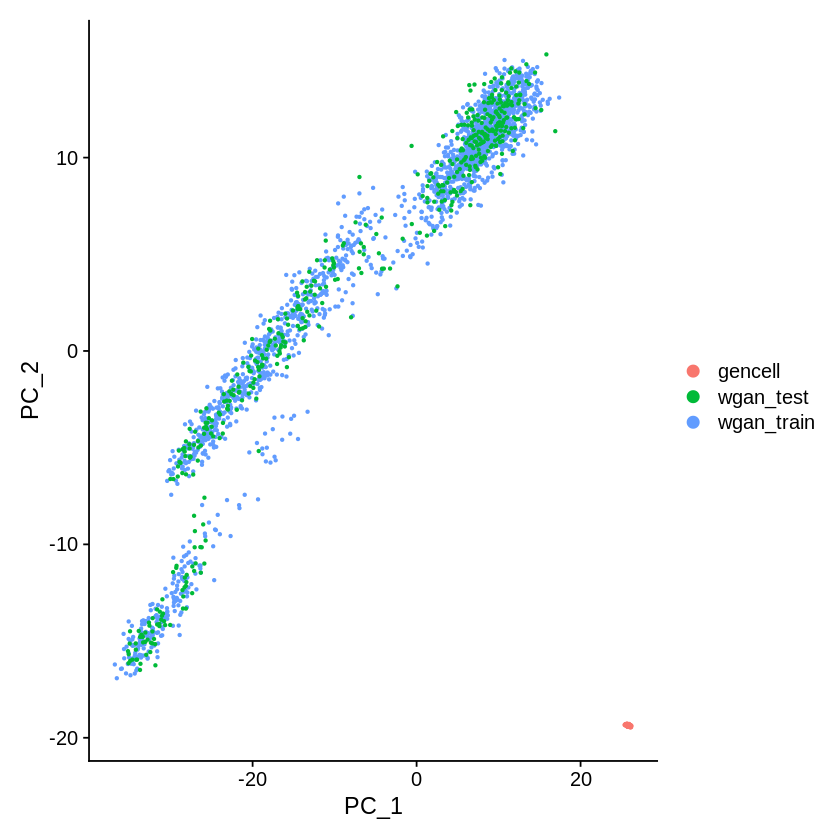

In [17]:
DimPlot(data_combined, reduction = "pca")

In [18]:
data_combined <- RunTSNE(object = data_combined, dims = 3:10)

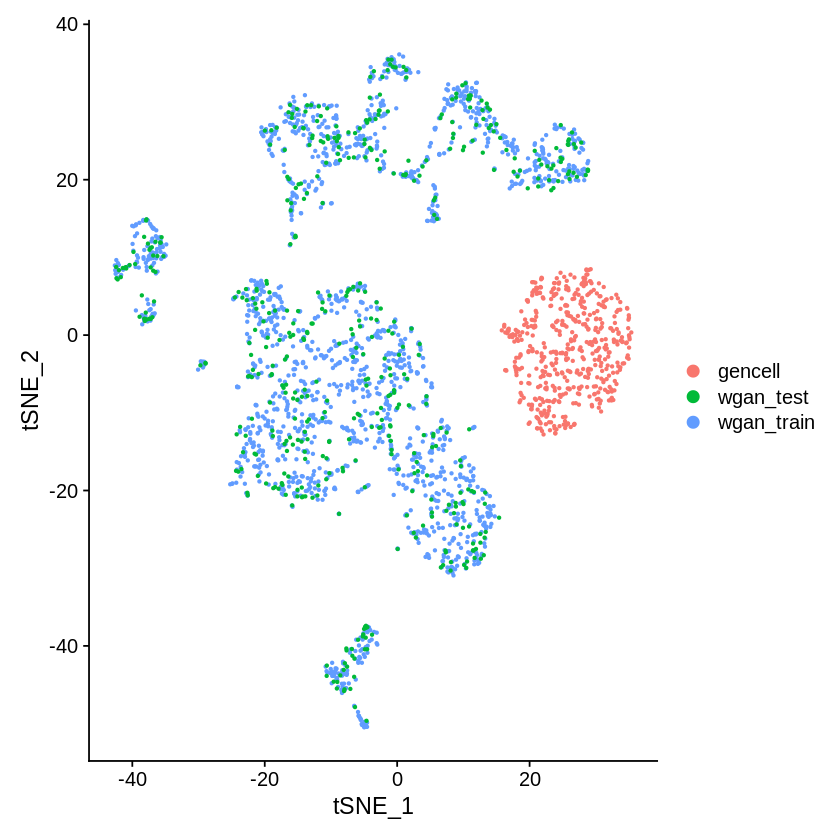

In [19]:
DimPlot(data_combined, reduction = "tsne")